In [120]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE

In [146]:
#Read csv file

df = pd.read_csv(r'D:\Pavi\DataScience\Datasets\bank_imputed.csv')

In [147]:
#Displaying first few rows of dataset

df.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2,1
1,1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1,0
2,2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0,0
3,3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0,0
4,4,0.907239,49,1,0.024926,12597.5,7,0,1,0,0,0


### Data Preparation

In [148]:
#General information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 12 columns):
Unnamed: 0                              65535 non-null int64
RevolvingUtilizationOfUnsecuredLines    65535 non-null float64
age                                     65535 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    65535 non-null int64
DebtRatio                               65535 non-null float64
MonthlyIncome                           65535 non-null float64
NumberOfOpenCreditLinesAndLoans         65535 non-null int64
NumberOfTimes90DaysLate                 65535 non-null int64
NumberRealEstateLoansOrLines            65535 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    65535 non-null int64
NumberOfDependents                      65535 non-null int64
SeriousDlqin2yrs                        65535 non-null int64
dtypes: float64(3), int64(9)
memory usage: 6.0 MB


In [149]:
#Dropping unwanted columns

df.drop('Unnamed: 0',axis=1,inplace=True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 11 columns):
RevolvingUtilizationOfUnsecuredLines    65535 non-null float64
age                                     65535 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    65535 non-null int64
DebtRatio                               65535 non-null float64
MonthlyIncome                           65535 non-null float64
NumberOfOpenCreditLinesAndLoans         65535 non-null int64
NumberOfTimes90DaysLate                 65535 non-null int64
NumberRealEstateLoansOrLines            65535 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    65535 non-null int64
NumberOfDependents                      65535 non-null int64
SeriousDlqin2yrs                        65535 non-null int64
dtypes: float64(3), int64(8)
memory usage: 5.5 MB


In [150]:
#Splitting independent and dependent variables

X = df.drop('SeriousDlqin2yrs',axis=1)
y = df['SeriousDlqin2yrs']

In [151]:
df['SeriousDlqin2yrs'].value_counts()

0    61150
1     4385
Name: SeriousDlqin2yrs, dtype: int64

In [128]:
#Splitting train and test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape
y_train.shape
y_test.shape

(19661,)

In [129]:
y_test.value_counts()

0    18355
1     1306
Name: SeriousDlqin2yrs, dtype: int64

In [130]:
y_train.value_counts()

0    42795
1     3079
Name: SeriousDlqin2yrs, dtype: int64

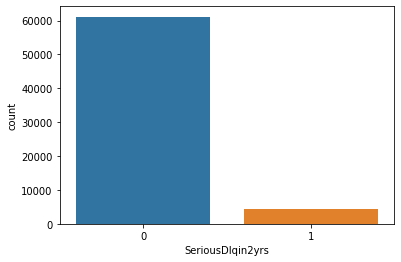

In [131]:
#Plotting the valuecounts in the target

sns.countplot(df['SeriousDlqin2yrs'])

### Balancing dataset

In [132]:
#Balancing dataset

bal = SMOTE(random_state=42)
X_train,y_train = bal.fit_sample(X_train,y_train)

In [133]:
X_train.shape

(85590, 10)

In [134]:
y_train.shape

(85590,)

In [135]:
y_train.value_counts()

1    42795
0    42795
Name: SeriousDlqin2yrs, dtype: int64

### Standardization

In [136]:
#Standardization

std = StandardScaler()
std.fit_transform(X_train,y_train)

array([[-0.02021637, -0.85197892, -0.13465819, ...,  0.13787884,
        -0.09214683,  2.2583314 ],
       [-0.02075936,  2.58836797, -0.13465819, ..., -0.782281  ,
        -0.09214683, -0.67551473],
       [-0.02089925,  1.65660735, -0.13465819, ..., -0.782281  ,
        -0.09214683, -0.67551473],
       ...,
       [-0.01982743, -1.21034839,  0.00874778, ..., -0.782281  ,
         0.05169499, -0.67551473],
       [-0.01824948,  0.07978169, -0.13465819, ...,  0.13787884,
        -0.09214683, -0.67551473],
       [-0.01788567, -1.28202228, -0.13465819, ..., -0.782281  ,
        -0.09214683, -0.67551473]])

## Feature Selection :Select From Model and Random Forest Classifcation

In [137]:
sfm =SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=42))
sfm.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [138]:
sfm.get_support()

array([ True,  True, False,  True,  True, False, False, False, False,
       False])

In [139]:
x1=X_train.columns[sfm.get_support()]
x1

Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome'],
      dtype='object')

### Model Evaluation

In [152]:

y_predict = clf.predict(X_test)

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[18177   178]
 [ 1084   222]]


In [153]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     18355
           1       0.56      0.17      0.26      1306

    accuracy                           0.94     19661
   macro avg       0.75      0.58      0.61     19661
weighted avg       0.92      0.94      0.92     19661



In [154]:
print("Accuracy score: ",accuracy_score(y_test,y_predict))

Accuracy score:  0.9358120136310463
